# Nabrajanje i prebrajanje elemenata skupa

Nabrajanje označava navođenje svakog pojedinačnog elementa skupa, dok se prebrojavanjem utvrđuje koliko elemenata je sadržano u određenom skupu.
Iako su ova dva problema usko povezana, često se u matematici i programiranju javljaju primeri kod kojih je rešenje jednog trivijalno, a drugog znatno teže.

Skupovi se dele na konačne i beskonačne. Nabrajanje i prebrojavanje konačnih skupova najčešće je jednostavno i ne predstavlja izazov. S druge strane, u pogledu prebrojavanja posebno su zanimljivi beskonačni skupovi. Jasno je da ni na koji način ne možemo navesti svaki element ovakih skupova, već u najboljem slučaju dati obrazac po kom se oni nalaze. Nasuprot tome, u pogledu prebrajanja, beskonačni skupovi se dele na prebrojive i neprebrojive.

**Definicija**

Skup koji se u celosti može bijektivno preslikati na skup prirodnih brojeva $N$ je **prebrojiv**.

Svaki beskonačan skup koji nije prebrojiv je **neprebrojiv**.


Jasno je da se u programiranju radi isključivo nad konačnim skupovima. Za nabrajanje i prebrojavanje koriste se rekurzivni i iterativni algoritmi koji se često oslanjaju na principe dinamičkog programiranja kako bi bili što efikasniji u pogledu memorije i vremena izvršavanja. Naredna dva jednostavna primera ilustruju kako možemo izlistati sve elemente nekog skupa ili samo odrediti broj elemenata.



**Primer 1**

Napisati python funkciju koja nabraja i prebrojava sve permutacije prosleđenog skupa brojeva (niza).

In [ ]:
def permute(nums):
        ans = []
        if len(nums) == 1:
            return [nums[:]]
        for num in nums:
            tmp = nums.pop(0)
            perms = permute(nums)
            for perm in perms:
                perm.append(tmp)
            ans += perms
            nums.append(tmp)
        return ans

perms = permute([1,2,3,4])
print(perms)
print("Broj permutacija: ", len(perms))

[[4, 3, 2, 1], [3, 4, 2, 1], [2, 4, 3, 1], [4, 2, 3, 1], [3, 2, 4, 1], [2, 3, 4, 1], [1, 4, 3, 2], [4, 1, 3, 2], [3, 1, 4, 2], [1, 3, 4, 2], [4, 3, 1, 2], [3, 4, 1, 2], [2, 1, 4, 3], [1, 2, 4, 3], [4, 2, 1, 3], [2, 4, 1, 3], [1, 4, 2, 3], [4, 1, 2, 3], [3, 2, 1, 4], [2, 3, 1, 4], [1, 3, 2, 4], [3, 1, 2, 4], [2, 1, 3, 4], [1, 2, 3, 4]]
Broj permutacija:  24


**Primer 2**

Napisati python funkciju koja kao parametre prima sumu novca (amount) i niz dostupnih apoena (coins) i vraća broj različitih načina na koji se ta suma može isplatiti.

In [ ]:
def change(amount, coins):
        dp=[0]*(amount+1)
        dp[0] = 1
        for coin in coins:
            for i in range(1, amount+1):
                if i - coin >=0:
                    dp[i] += dp[i-coin]
        return dp[-1]

print("Broj kombinacija novcica: ", change(5, [1,2,5]))

Broj kombinacija novcica:  4


##Kako se prebrojavaju elementi konačnog skupa?
---
Po definiciji razlikujemo dva slučaja konačnog skupa:

*   $S = \varnothing$
*   $S \neq \varnothing$ i postoji bijektivno preslikavanje iz skupa $S$ u skup prvih $n$ prirodnih brojeva

Prebrojavanje elemenata konačnog skupa je usko povezano sa osobinom skupova, **kardinalnošću**.

Kardinalnost je veličina kojom izražavamo broj elemenata skupa. Za skup $S$, njegova kardinalnost se označava sa $|S|$. Skup $A$ i skup $B$ imaju istu kardinalnost ako i samo ako postoji bijektivno preslikavanje izmedju njih.

*   Za prazan skup $S$ možemo reći da je kardinalni broj $0$,
$S = \varnothing → |S| = 0$

*   Za neprazan konačan skup $S=$ { $a_1​,a_2​,a_3​,…, a_n$ } gde je $n \in N$, kardinalitet skupa je $|S|=n$, gde je $n$ broj elemenata u skupu.

Prebrojavanje konačnog skupa $A$ predstavlja bijektivno preslikavanje koje svaki element skupa $A$ jednoznačno mapira na odgovarajući element iz skupa $N_n=${$1,2,3,…,n$} za $n \neq ∞$, gde se numeracija elemenata skupa $A$ vrši započinjući od $1$, i svaki sledeći element dobija sledeći prirodni broj, uvećan za $1$. Matematički, ovo preslikavanje možemo formalno zapisati kao:

$f:A→N_n$ takvo da je $f(a_i)=i,∀i∈${$1,2,...,n$}

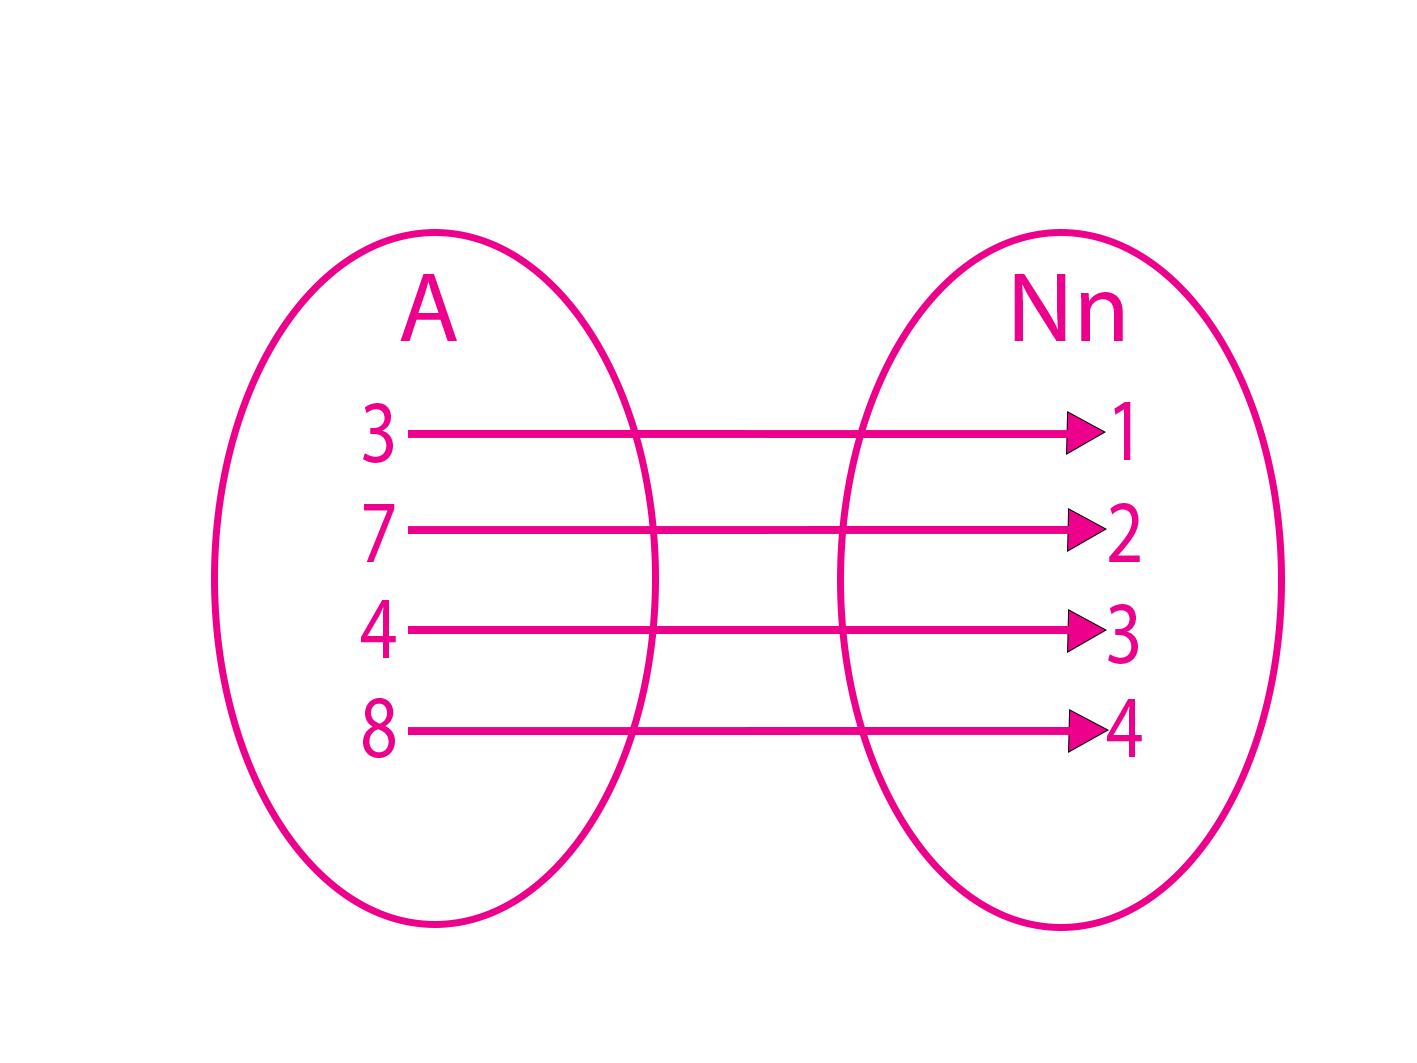
Ova funkcija $f$ je bijekcija jer je svaki element skupa $A$ preslikan tačno jednom, i svaki element skupa $N_n$ ima jedinstveni original u skupu $A$.

Možemo jednostavno prebrojati elemente konačnog skupa u Pythonu koristeći ```len(S)``` koji će vratiti broj elemenata u skupu.

**Rekurzivno** prebrojavanje je metod koji se može koristiti kod većih skupova.

In [ ]:

def count_elements_recursively(set_elements):
    # Osnovni slučaj: Ako je skup prazan, ima 0 elemenata
    if not set_elements:
        return 0
    else:
        # Rekurzivno prebrojavanje: oduzmi jedan element i saberi sa brojem elemenata preostalog skupa
        return 1 + count_elements_recursively(set_elements[1:])

#primer rekuryivnog prebrojavanja
set_example = ['a1', 'a2', 'a3', 'a4']
count_elements_recursively(set_example)

4

# Prebrojavanje beskonačnih skupova

Prebrojavanje elemenata prebrojivo beskonačnog skupa podrazumeva da je moguće uspostaviti jednoznačnu korespondenciju između elemenata tog skupa i prirodnih brojeva. U matematičkom jeziku, skup je prebrojivo beskonačan ako se njegovi elementi mogu rasporediti u niz, odnosno ako postoji bijekcija (jedan-na-jedan funkcija) između elemenata tog skupa i skupa prirodnih brojeva $N={1,2,3,…}$.
Formalna definicija:

Skup $A$ je prebrojivo beskonačan ako postoji bijektivna funkcija $f:N→A$, koja svakoj vrednosti iz skupa prirodnih brojeva $N$ pridružuje tačno jedan element iz skupa $A$.

Drugim rečima, možemo napisati skup A kao niz elemenata:

  $A$ $=$ { $a_1​,a_2​,a_3​,…$ }

gde svaki element $ai$​ iz skupa A može biti identifikovan s nekim prirodnim brojem i, pri čemu za svaki element postoji odgovarajući prirodni broj, i obrnuto.
Primeri prebrojivo beskonačnih skupova:

1. Skup prirodnih brojeva $N$\: Skup $N$ $=$ { $1,2,3,…$ } je prebrojivo beskonačan jer postoji trivijalna funkcija identiteta $f(n)=n$, koja svakom prirodnom broju pridružuje samog sebe.

2. Skup celih brojeva $Z$: Skup $Z$ $=$ {$ …,−2,−1,0,1,2,… $} je takođe prebrojivo beskonačan jer možemo uspostaviti bijekciju između prirodnih brojeva $N$ i $Z$ koristeći funkciju:
      
  $f(n) =
  \begin{cases}
  \frac{n}{2}, & \text{ako je } n \text{ parno} \\
  -\frac{n - 1}{2}, & \text{ako je } n \text{ neparno}
  \end{cases}
  $
     

  Ova funkcija preslikava prirodne brojeve na cele brojeve na način da se svi celi brojevi obuhvate.

3. Skup racionalnih brojeva $Q$: Iako se na prvi pogled čini da racionalnih brojeva ima više nego prirodnih, skup $Q$ je prebrojivo beskonačan.

**Zaključak:**

Skup je prebrojivo beskonačan ako se njegovi elementi mogu dovesti u korespondenciju sa prirodnim brojevima $N$. Proces prebrojavanja takvog skupa nije moguć u konačnom smislu (ne možemo ih sve izbrojati), ali matematički možemo dokazati da postoji način da se svaki element poveže sa nekim prirodnim brojem, čime se ustanovljava njegova prebrojivost.


**Zadatak:**

Dokazati da je skup Racionalnih brojeva $Q$ prebrojivo beskonačan.


Skup $(S)$ je **prebrojivo beskonačan** ako postoji bijekcija između skupa $(S)$ i skupa prirodnih brojeva ${N}$.


Pokazaćemo da je skup racionalnih brojeva ${Q}$ prebrojivo beskonačan konstruišući bijekciju između ${Q}$ i skupa prirodnih brojeva ${N}$.

**Korak 1:** Definicija racionalnih brojeva

Skup racionalnih brojeva možemo izraziti kao:

${Q}$$ =  { $ \frac{p}{q}$ : $ p$ $\in$ ${Z}$, $q$ $\in$ ${N}$ ${ i }$ $NZS$ $(p, q) = 1\$ }

gde je $NZD(p, q)$ najveći zajednički delilac $p$ i $q$.

**Korak 2:** Enumeracija racionalnih brojeva

Racionalne brojeve možemo enumerisati organizovanjem u dvodimenzionalnu mrežu, gde redovi predstavljaju brojilac, a kolone imenilac:

\begin{array}{c|cccc}
    & 1 & 2 & 3 & 4 \\
  \hline
  1 & \frac{1}{1} & \frac{1}{2} & \frac{1}{3} & \frac{1}{4} \\
  2 & \frac{2}{1} & \frac{2}{2} & \frac{2}{3} & \frac{2}{4} \\
  3 & \frac{3}{1} & \frac{3}{2} & \frac{3}{3} & \frac{3}{4} \\
  4 & \frac{4}{1} & \frac{4}{2} & \frac{4}{3} & \frac{4}{4} \\
\end{array}

**Korak 3:** Dijagonalna enumeracija
Možemo nabrajati razlomke tako što ćemo prolaziti kroz mrežu dijagonalno, preskočivši duplikate (nerazvedene razlomke):

1. Počinjemo od $\frac{1}{1}$.
2. Krećemo se dijagonalno i uključujemo samo one razlomke za koje važi $NZD(p, q) = 1$.

Enumeracija se odvija na sledeći način:

- Iz mreže:
\[$
\frac{1}{1}, \frac{1}{2}, \frac{2}{1}, \frac{1}{3}, \frac{3}{1}, \frac{2}{3}, \frac{3}{2}, \frac{1}{4}, \ldots
$\]

- Preskočivši duplikate, dobijamo:
\[$
\frac{1}{1}, \frac{1}{2}, \frac{2}{1}, \frac{1}{3}, \frac{3}{1}, \frac{1}{4}, \frac{2}{3}, \frac{3}{2}, \ldots
$\]

**Korak 4:** Konstruisanje bijekcije
Sada možemo definisati funkciju $f: $${N}$ $\to$ ${Q}$ koja dodeljuje svaki prirodni broj jedinstvenom racionalnom broju u našoj enumeraciji.

Na primer:

\begin{align*}
f(1) & = \frac{1}{1} \\
f(2) & = \frac{1}{2} \\
f(3) & = \frac{2}{1} \\
f(4) & = \frac{1}{3} \\
f(5) & = \frac{3}{1} \\
f(6) & = \frac{1}{4} \\
& \vdots
\end{align*}


Ova funkcija $f$ je bijekcija jer se svaki racionalni broj može izraziti u obliku $\frac{p}{q}$ sa jedinstvenim $p$ i $q$, čime se osigurava da se svaki prirodni broj podudara sa tačno jednim racionalnim brojem.

**Zaključak**
Pošto smo konstruisali bijekciju između skupa prirodnih brojeva ${N}$ i skupa racionalnih brojeva ${Q}$, zaključujemo da je skup racionalnih brojeva prebrojivo beskonačan.







# 1. Princip množenja (Multiplikativni princip)
**Zadatak:** Koliko različitih šifara možemo napraviti koristeći 4 cifre, gde svaka cifra može biti bilo koji broj od 0 do 9?

**Rešenje:**

Za svaku od 4 cifre imamo 10 opcija (brojevi 0-9). Po principu množenja, ukupan broj mogućih šifara je:

$10^4 = 10000$

# 2. Princip sabiranja (Aditivni princip)

Jedan od najčešćih pristupa pri prebrajanju konačnih skupova se sastoji iz deljenja početnog skupa na disjunktne podskupove. Na taj način dobijamo manje celine koje dele jednu ili više osobina i samim tim lakše možemo doći do njihove kardinalnosti. Budući da su te celine disjunktne, odnosno ne dele zajedničke elemente, sabiranjem broja elemenata svih podskupova rešavamo početni problem.

**Zadatak:** Imamo dva šešira: u prvom su kockice sa 5 tačaka, a u drugom sa 8. Koliko tačaka ćemo dobiti ako izvučemo $x$ kockica iz prvog i $y$ iz drugog šešira?

**Rešenje:**

Princip sabiranja vazi ako su 2 dogadjaja nezavisna, a nama su 1. i 2. šesir nezavisni. Onda je jasno da je ukupan broj tačaka:
$x*5 + y*8$


# 3. Permutacije
**Zadatak:** Na koliko načina možemo poređati 5 različitih knjiga na polici?

**Rešenje:**

Broj permutacija od $n$ različitih elemenata je:

$n!=n×(n-1)×...×2×1 \;\;\; \overset{n=5}{\implies} \;\;\;$  Naše rešenje:  $5!=120$



#4. Kombinacije

**Zadatak:** Iz grupe od 10 studenata treba izabrati komisiju od 3 studenta. Koliko različitih komisija možemo formirati?

**Rešenje:** Broj odabira $k$ elemanata od $n$ različitih elemenata je kombinacija $C(n,k)$.

$
C(n,k)=\binom{n}{k} = \frac{n!}{(n-k)!k!}
$

Broj odabira $k$ osoba od $n$ je *multiplikativnim principom* proizvod $n$ opcija za 1. osobu, $n-1$ za 2. osobu, ... , do preostalih *n-k+1* za k. osobu. U formuli za kombinacije naknadno delimo sa $k!$ jer nam je nebitan redosled, te delimo sa brojem *permutacija*.

Odatle imamo za naše rešenje: $C(10,3)=\binom{10}{3} = \frac{10!}{(10-3)!3!}=120 $.


#5.Princip  uključivanja i isključivanja

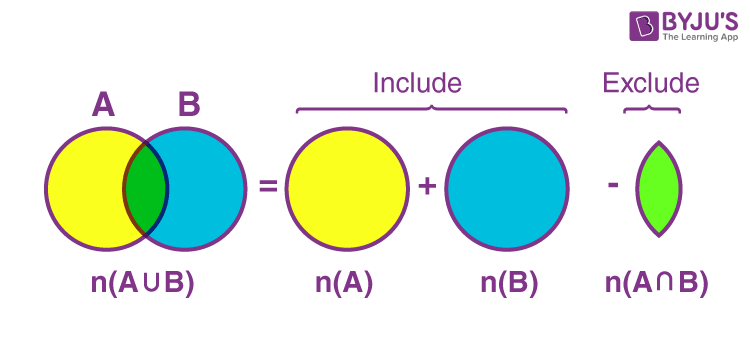

**Zadatak:**
 U jednoj anketi, 40 ljudi voli fudbal, 30 voli košarku, a 10 voli oba sporta. Koliko ljudi voli barem jedan sport?


**Rešenje:**
Po principu uključivanja i isključivanja:

$∣ 𝐴 ∪ 𝐵 ∣ = ∣ 𝐴 ∣ + ∣ 𝐵 ∣ − ∣ 𝐴 ∩ 𝐵 ∣ = 40 + 30 − 10 = 60$


#6. Dirihleov princip (Pidgeonhole principle)
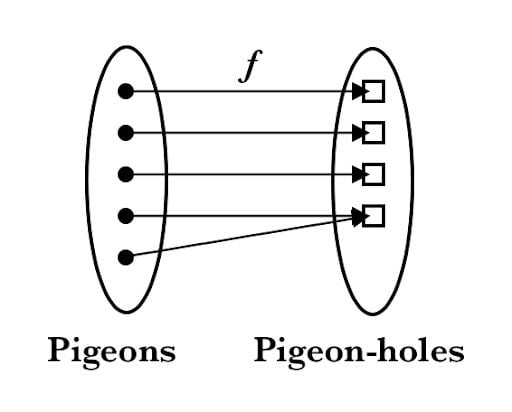

**Zadatak:**

Dokazati da ako se iz skupa ${1,2,...,11}$ nasumično izvuče 7 različitih brojeva, tada će među izvučenim brojevima uvek postojati bar dva čiji je zbir 12.

**Rešenje:**

Prvo ćemo formirati sve moguće parove brojeva čiji zbir je 12. U našem slučaju to su: $(1,11), (2,10), (3,9), (4,8), (5,7), (6,6)$. Prema Dirihleovom principu, izvlačenjem 7 različitih brojeva, bar dva će pripadati istom paru i samim tim njihov zbir će biti 12.

